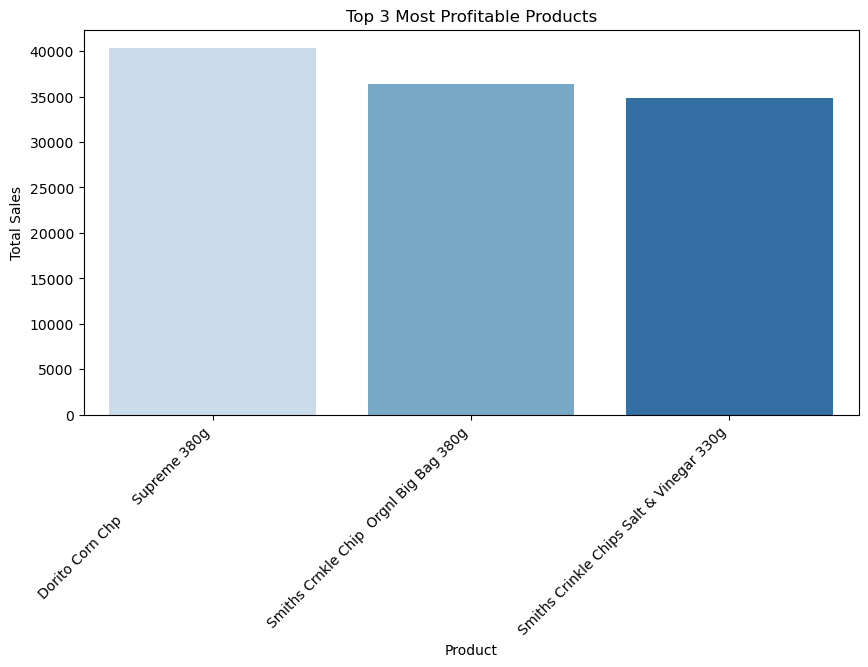

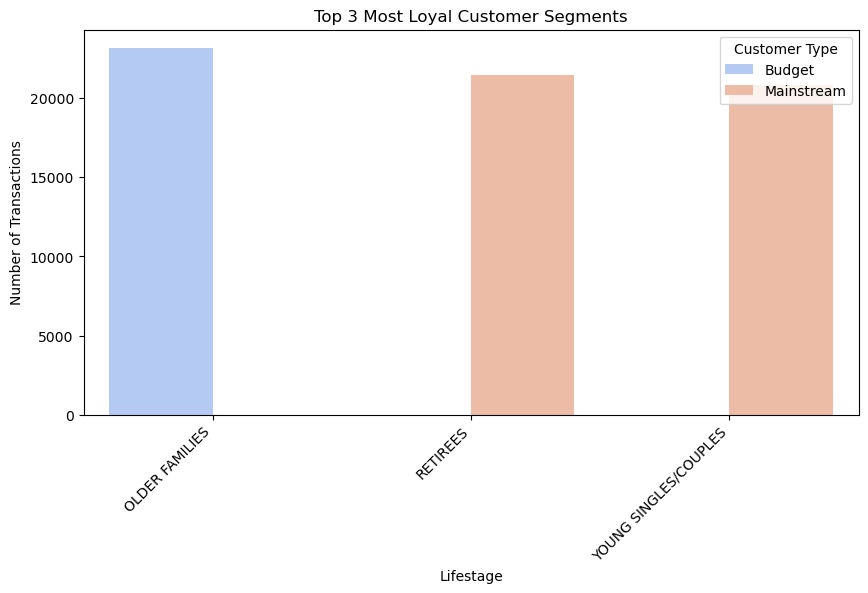

Top 3 Most Profitable Products:
    PROD_NBR                                 PROD_NAME  TOT_SALES
3          4          Dorito Corn Chp     Supreme 380g    40352.0
13        14    Smiths Crnkle Chip  Orgnl Big Bag 380g    36367.6
15        16  Smiths Crinkle Chips Salt & Vinegar 330g    34804.2

Most Loyal Customer Segments:
                LIFESTAGE PREMIUM_CUSTOMER  LYLTY_CARD_NBR
6          OLDER FAMILIES           Budget           23160
13               RETIREES       Mainstream           21466
19  YOUNG SINGLES/COUPLES       Mainstream           20854


In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
transaction_file_path = "D:/Download/transaction_data.csv"
purchase_behaviour_file_path = "D:/Download/purchase_behaviour.csv"

# Read the CSV files
transaction_data = pd.read_csv(transaction_file_path)
purchase_behaviour_data = pd.read_csv(purchase_behaviour_file_path)

# Identify top 3 most profitable products
top_products = (
    transaction_data.groupby(["PROD_NBR", "PROD_NAME"])["TOT_SALES"]
    .sum()
    .reset_index()
    .sort_values(by="TOT_SALES", ascending=False)
    .head(3)
)

# Merge transaction data with purchase behavior to analyze customer characteristics
merged_data = transaction_data.merge(
    purchase_behaviour_data, on="LYLTY_CARD_NBR", how="left"
)

# Identify the most common customer characteristics based on transaction count
loyal_customers = (
    merged_data.groupby(["LIFESTAGE", "PREMIUM_CUSTOMER"])["LYLTY_CARD_NBR"]
    .count()
    .reset_index()
    .sort_values(by="LYLTY_CARD_NBR", ascending=False)
    .head(3)
)

# Visualization part
plt.figure(figsize=(10, 5))
sns.barplot(x=top_products["PROD_NAME"], y=top_products["TOT_SALES"], palette="Blues")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Product")
plt.ylabel("Total Sales")
plt.title("Top 3 Most Profitable Products")
plt.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=loyal_customers["LIFESTAGE"], y=loyal_customers["LYLTY_CARD_NBR"], hue=loyal_customers["PREMIUM_CUSTOMER"], palette="coolwarm")
plt.xticks(rotation=45, ha="right")
plt.xlabel("Lifestage")
plt.ylabel("Number of Transactions")
plt.title("Top 3 Most Loyal Customer Segments")
plt.legend(title="Customer Type")
plt.show()

# Print findings
print("Top 3 Most Profitable Products:")
print(top_products)
print("\nMost Loyal Customer Segments:")
print(loyal_customers)
